In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# to ignore the warning of pandas chained assignment
pd.options.mode.chained_assignment = None

# dataset from https://www.kaggle.com/robikscube/hourly-energy-consumption

# using pjm_hourly_est.csv file because it has the records of the whole PJM regions together
df = pd.read_csv('data/pjm_hourly_est.csv')

# set Datetime as index
df.set_index('Datetime', inplace=True)

# convert index to datetime
df.index = pd.to_datetime(df.index)

# sort by date
df.sort_values(by=['Datetime'], inplace=True)

# perceiving the data
df

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22259.0
1998-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21244.0
1998-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20651.0
1998-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20421.0
1998-04-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20713.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,16437.0,2554.0,4052.0,14038.0,1966.0,1815.0,9866.0,NaN,44057.0,6545.0,NaN
2018-08-02 21:00:00,17303.0,15590.0,2481.0,3892.0,13832.0,1944.0,1769.0,9656.0,NaN,43256.0,6496.0,NaN
2018-08-02 22:00:00,17001.0,15086.0,2405.0,3851.0,13312.0,1901.0,1756.0,9532.0,NaN,41552.0,6325.0,NaN


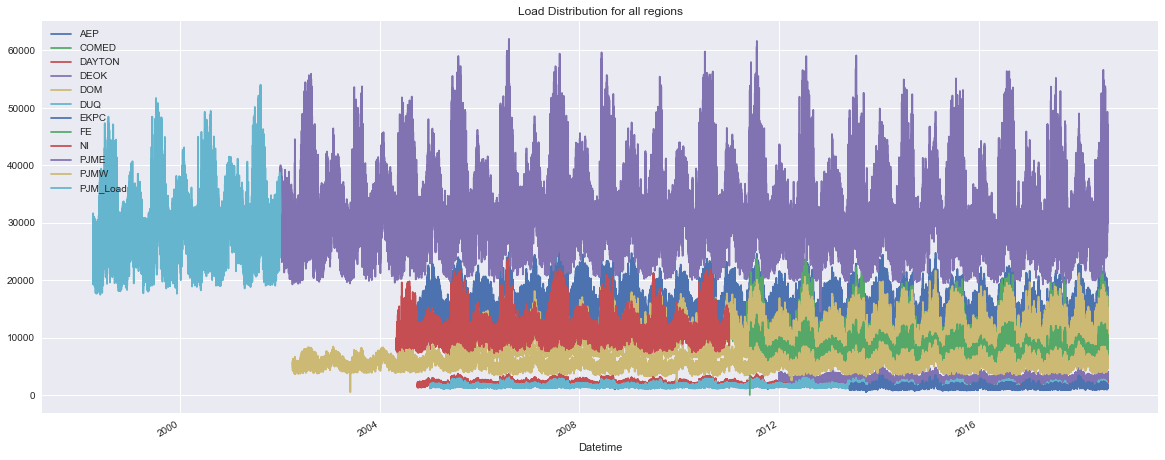

In [2]:
# Distribution of Load for all regions
plt.style.use('seaborn')
plot = df.plot(figsize=(20, 8), title='Load Distribution for all regions')

# we see that each region has a different energy consumption pattern
# so its better to make predictions for each region separately
# we choose the region with the most data "least missing values"

Text(0, 0.5, 'missing values')

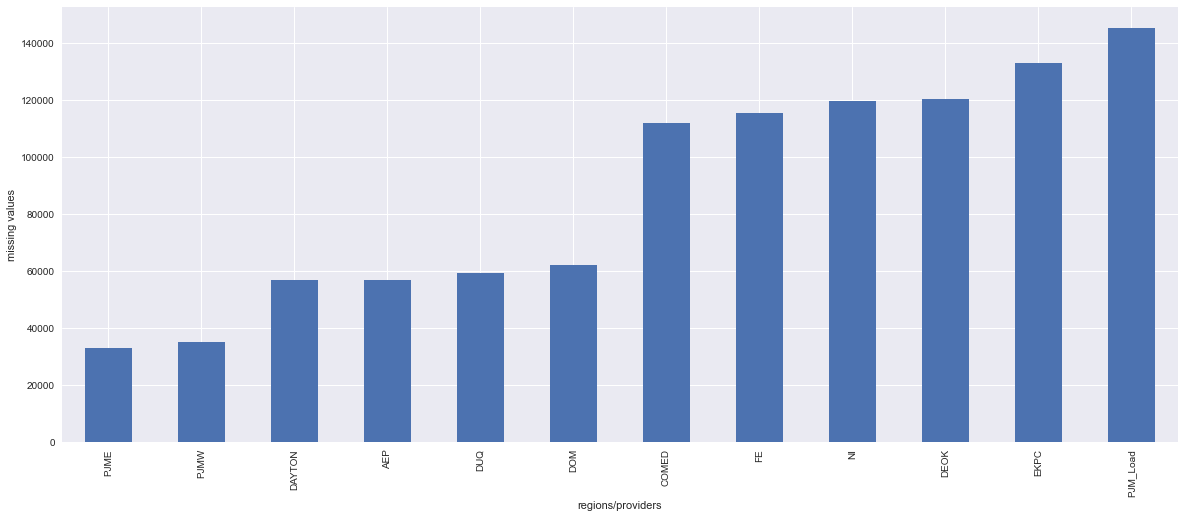

In [3]:
# checking for missing values
missing_values_df = df.isnull().sum()

# plotting the missing values
missing_values_df.sort_values(ascending=True).plot(kind='bar', figsize=(20, 8))
plt.xlabel("regions/providers")
plt.ylabel("missing values")

# the one with the least missing values is PJME

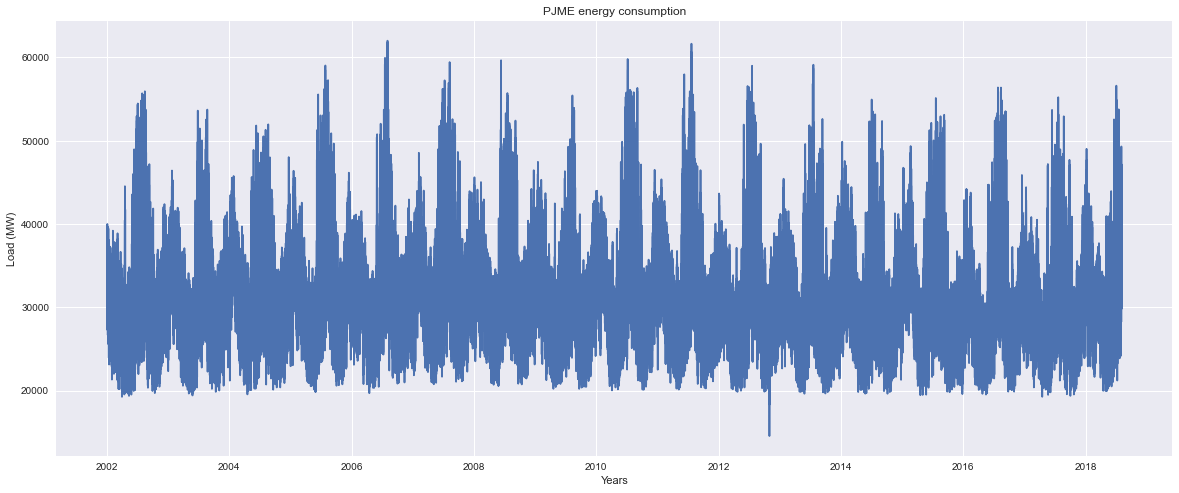

In [4]:
# removing all columns except PJME
df = df[['PJME']]

# removing the missing values
df.dropna(inplace=True)

# visualizing the data
plt.figure(figsize=(20, 8))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption')
plt.show()

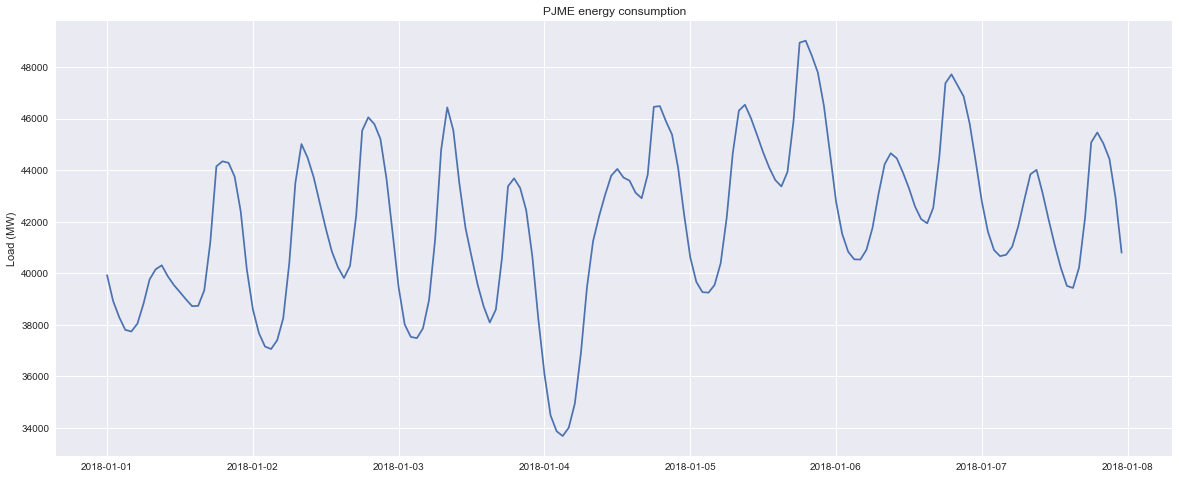

In [5]:
# visualizing a single week
plt.figure(figsize=(20, 8))
plt.plot(df['2018-01-01':'2018-01-07'])
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption')
plt.show()

In [6]:
# a function that will split the index to be used for hourly, daily, weekly, monthly, yearly and seasonal analysis

def split_df_features_for_plotting(df):
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.day_of_week
    df['day_of_week'] = df['day_of_week'].replace({0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'})
    df['month'] = df.index.month
    df['month'] = df['month'].replace({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})
    df['year'] = df.index.year
    df['season'] = df.index.month % 12 // 3 + 1
    df['season'] = df['season'].replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
    return df

df2 = df.copy()
df2 = split_df_features_for_plotting(df2)
df2

,PJME,hour,day_of_week,month,year,season
Datetime,,,,,,
2002-01-01 01:00:00,30393.0,1,tuesday,january,2002,winter
2002-01-01 02:00:00,29265.0,2,tuesday,january,2002,winter
2002-01-01 03:00:00,28357.0,3,tuesday,january,2002,winter
2002-01-01 04:00:00,27899.0,4,tuesday,january,2002,winter
2002-01-01 05:00:00,28057.0,5,tuesday,january,2002,winter
...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,thursday,august,2018,summer
2018-08-02 21:00:00,43256.0,21,thursday,august,2018,summer
2018-08-02 22:00:00,41552.0,22,thursday,august,2018,summer


Text(0.5, 1.0, 'PJME energy consumption by hour')

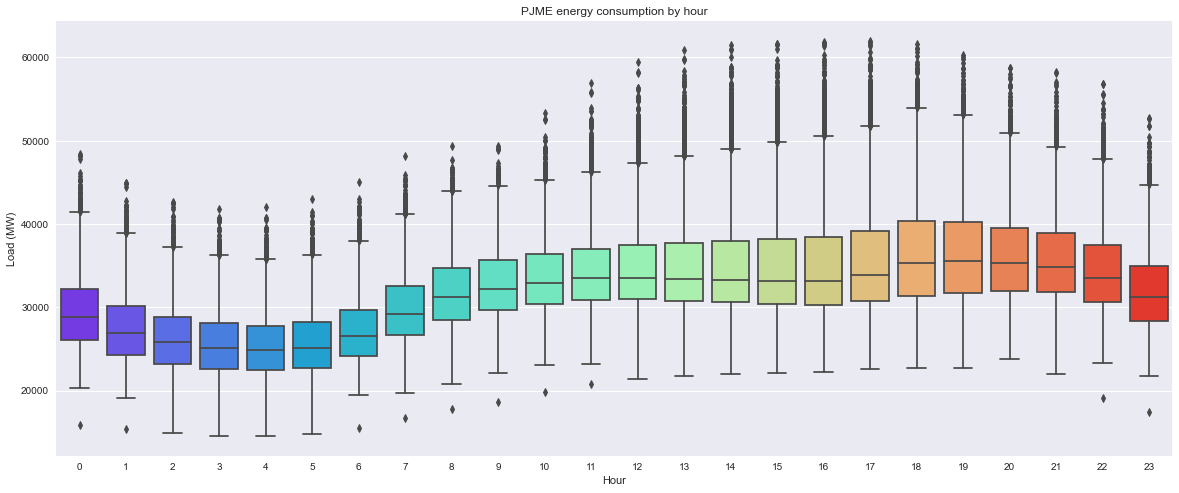

In [7]:
# plotting the hourly energy use

plt.figure(figsize=(20, 8))
sns.boxplot(x='hour', y='PJME', data=df2, palette='rainbow')
plt.xlabel('Hour')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption by hour')

Text(0.5, 1.0, 'PJME energy consumption by month')

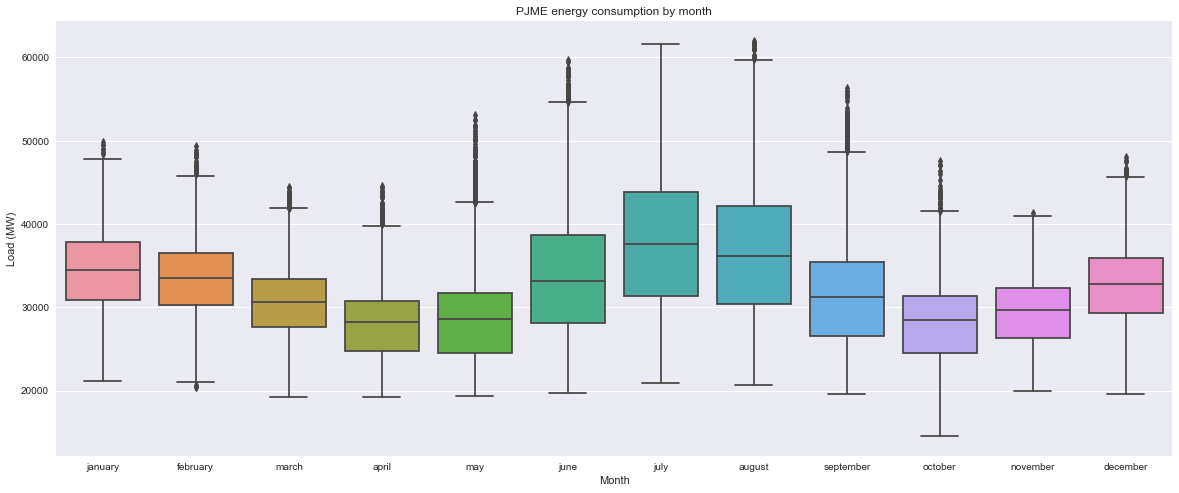

In [8]:
# plotting the monthly energy use

plt.figure(figsize=(20, 8))
sns.boxplot(x='month', y='PJME', data=df2)
plt.xlabel('Month')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption by month')


Text(0.5, 1.0, 'PJME energy consumption by day of week')

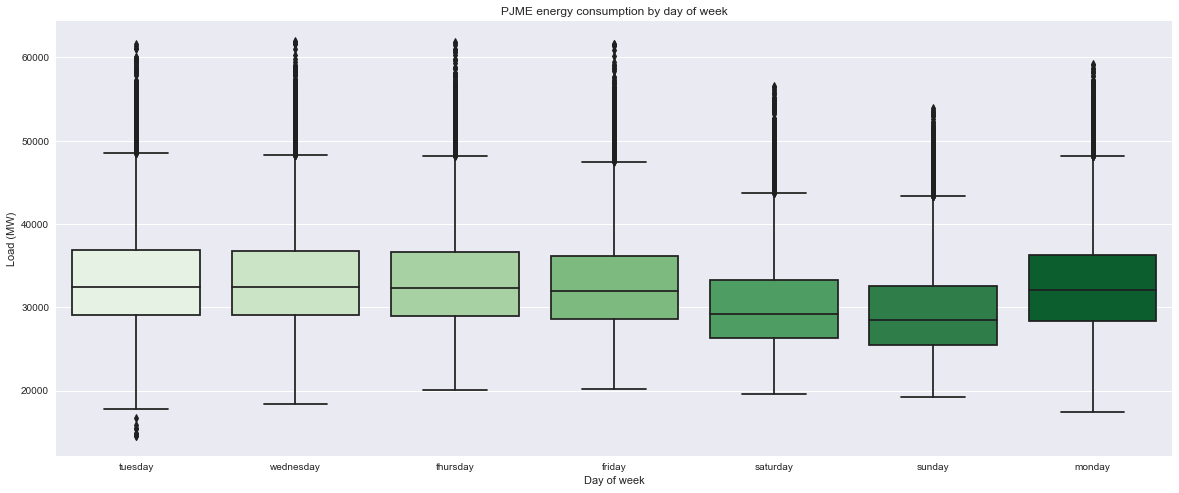

In [9]:
# plotting the daily energy use
plt.figure(figsize=(20, 8))
sns.boxplot(x='day_of_week', y='PJME', data=df2, palette='Greens')
plt.xlabel('Day of week')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption by day of week')

Text(0.5, 1.0, 'PJME energy consumption by season')

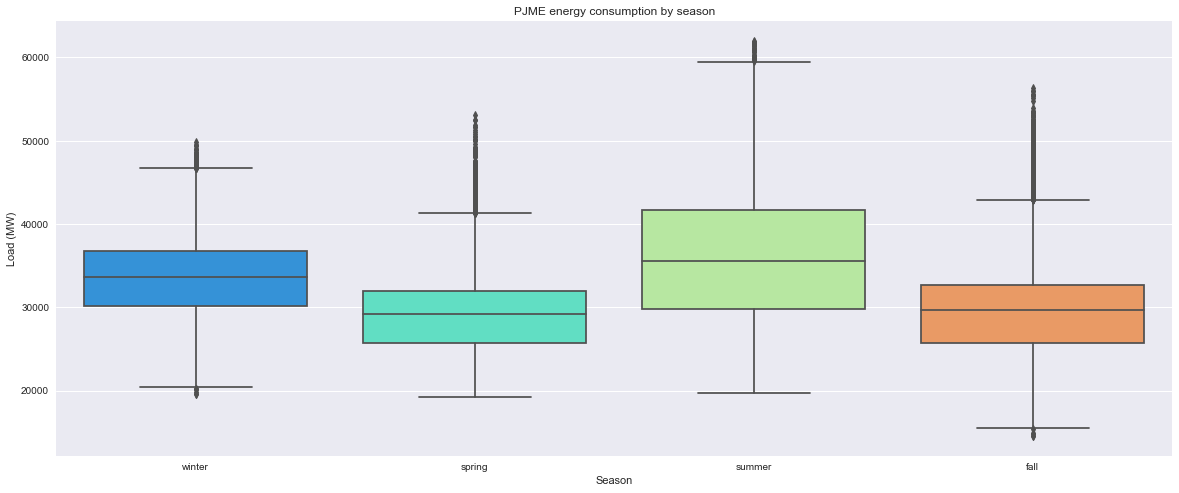

In [10]:
# plotting the seasonal energy use
plt.figure(figsize=(20, 8))
sns.boxplot(x='season', y='PJME', data=df2, palette='rainbow')
plt.xlabel('Season')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption by season')

Text(0.5, 1.0, 'PJME energy consumption by day of week and hour')

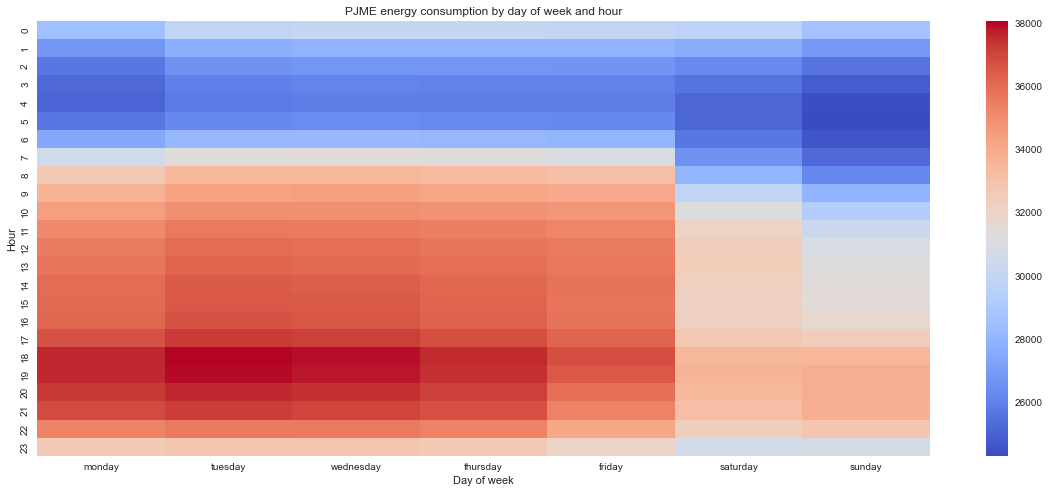

In [11]:
# heatmap of daily energy use
plt.figure(figsize=(20, 8))

# sorting the day of week before plotting
df2['day_of_week'] = pd.Categorical(df2['day_of_week'], categories=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], ordered=True)

sns.heatmap(df2.groupby(['hour', 'day_of_week'])['PJME'].mean().unstack(), cmap='coolwarm')
plt.xlabel('Day of week')
plt.ylabel('Hour')
plt.title('PJME energy consumption by day of week and hour')


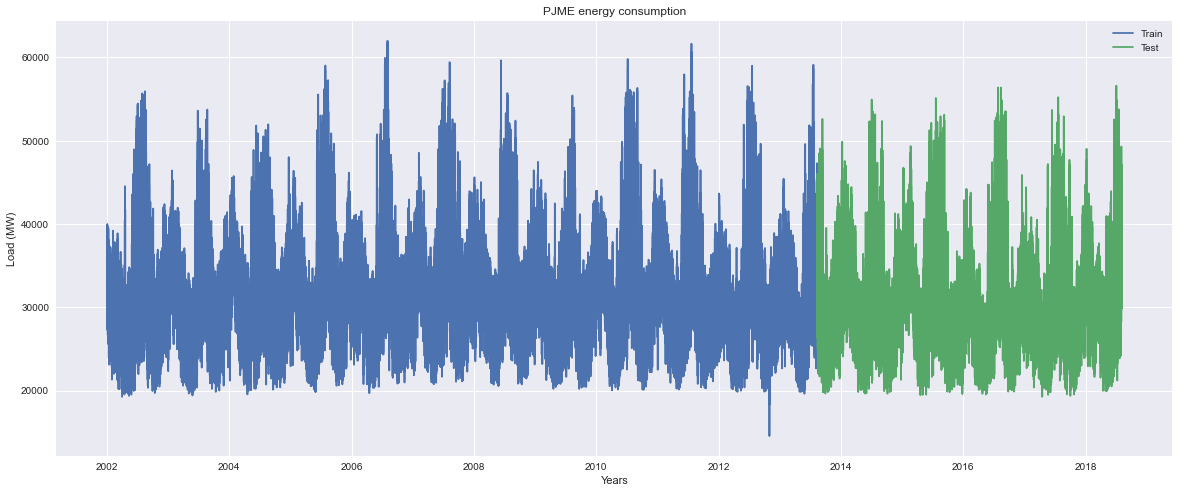

In [12]:
# splitting the data into test 70% train and 30% test
test_size = int(len(df) * 0.3)
test_index = len(df) - test_size
train = df[:test_index]
test = df[test_index:]

# plotting the train and test data
plt.figure(figsize=(20, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.xlabel('Years')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption')
plt.legend()
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

# a function to normalize the data between 0 and 1
def normalize_data(df):
    scaler = MinMaxScaler()
    temp = df.values
    temp = temp.astype('float32')
    df = scaler.fit_transform(temp)
    return df

train = normalize_data(train)
test = normalize_data(test)

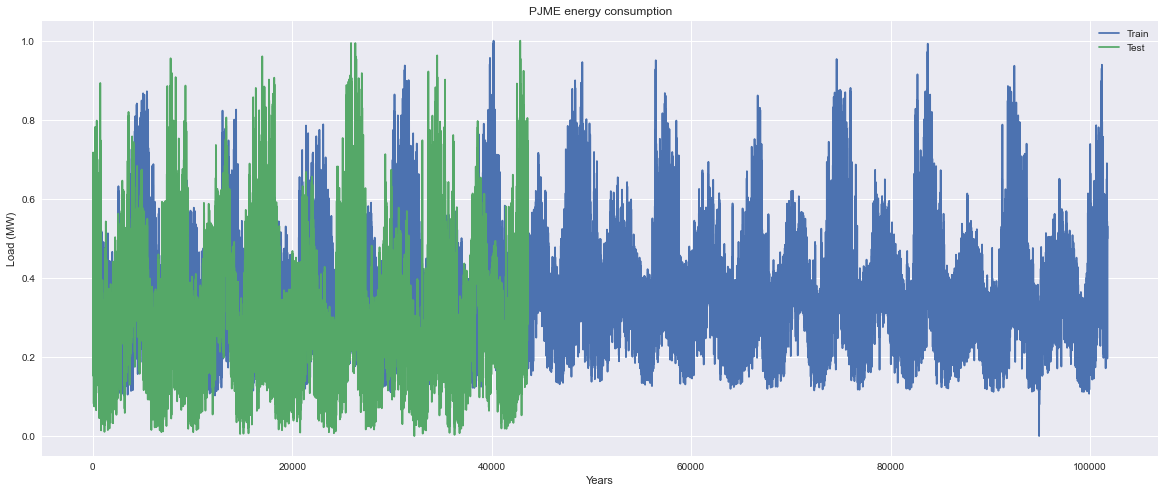

In [14]:
# plotting the normalized data
plt.figure(figsize=(20, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.xlabel('Years')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption')
plt.legend()
plt.show()

In [15]:
# function to convert an array of values into a dataset matrix
# look_back is basically the number of previous time steps to use as input variables to predict the next time period
# we set it by default to 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
look_back = 5
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train.shape , x_test.shape,   y_train.shape , y_test.shape

((101751, 5), (43603, 5), (101751,), (43603,))

In [17]:
# reshaping the input to be used by the LSTMs model
# The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].
# Currently, the data is in the form: [samples, features] so it needs to be reshaped.

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((101751, 1, 5), (43603, 1, 5), (101751,), (43603,))

In [18]:
# building the neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation, Dropout
from tensorflow.keras.callbacks import LambdaCallback, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop


def create_model():
    # creating the model
    model = Sequential()

    # adding the LSTM layer
    model.add(LSTM(32, input_shape=(x_train.shape[1], x_train.shape[2])))

    # adding the dropout layer
    model.add(Dropout(0.2))

    # dense layer
    model.add(Dense(1))

    # compiling the model
    model.compile(loss='mse', optimizer='sgd')
    
    return model

model = create_model()

# training the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
3180/3180 [==============================] - 13s 3ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 2/5
3180/3180 [==============================] - 17s 5ms/step - loss: 0.0060 - val_loss: 0.0065
Epoch 3/5
3180/3180 [==============================] - 14s 5ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 4/5
3180/3180 [==============================] - 8s 3ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 5/5
3180/3180 [==============================] - 9s 3ms/step - loss: 0.0034 - val_loss: 0.0037


In [19]:
from sklearn.metrics import r2_score

# predicting the values
y_pred = model.predict(x_test)

# evaluating the model
r2_score(y_test, y_pred)

1363/1363 [==============================] - 2s 1ms/step


0.8691794554894791

In [20]:
# tuning the model using keras tuner

import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='mse')
    return model

# choosing the Hyperband search algorithm, while saving search results to the directory 'my_dir/intro_to_kt'
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=10, factor=3, directory='my_dir', project_name='best_model_project')

# searching for the best hyperparameters
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# getting the best model
best_model = tuner.get_best_models(num_models=1)[0]

# training the best model
best_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


INFO:tensorflow:Reloading Oracle from existing project my_dir\best_model_project\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\best_model_project\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
3180/3180 [==============================] - 16s 4ms/step - loss: 5.4790e-04 - val_loss: 3.1691e-04
Epoch 2/10
3180/3180 [==============================] - 12s 4ms/step - loss: 3.6127e-04 - val_loss: 3.1947e-04
Epoch 3/10
3180/3180 [==============================] - 12s 4ms/step - loss: 3.4469e-04 - val_loss: 3.5739e-04
Epoch 4/10
3180/3180 [==============================] - 13s 4ms/step - loss: 3.3476e-04 - val_loss: 3.4192e-04
Epoch 5/10
3180/3180 [==============================] - 13s 4ms/step - loss: 3.2749e-04 - val_loss: 3.7980e-04
Epoch 6/10
3180/3180 [==============================] - 17s 5ms/step - loss: 3.2501e-04 - val_loss: 3.8004e-04
Epoch 7/10
3180/3180 [==============================] - 24s 7ms/step - loss: 3.2073e-04 - val_loss: 3.4604e-04
Epoch 8/10
3180/3

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# evaluating the model score
y_pred = best_model.predict(x_test)
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R2 score: ', r2_score(y_test, y_pred))

1363/1363 [==============================] - 4s 2ms/step
Mean squared error:  0.00029462238
Mean absolute error:  0.012796097
R2 score:  0.9897078932127454


In [22]:
# exporting the model
best_model.save('best_model.h5')

# we can  then later load the model like  this
# from tensorflow.keras.models import load_model
# model = load_model('best_model.h5')

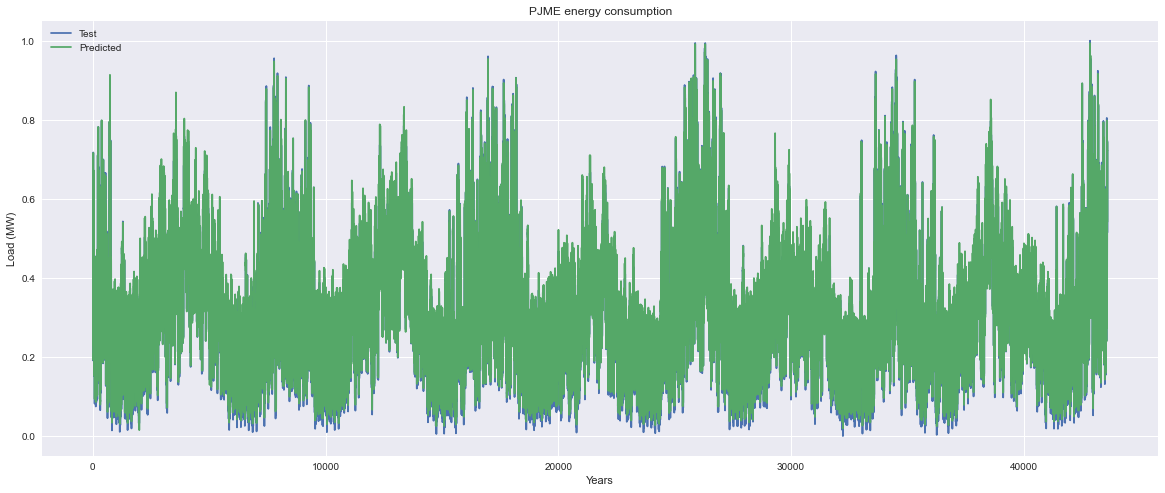

In [23]:
# plotting the predicted values
plt.figure(figsize=(20, 8))
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Years')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption')
plt.legend()
plt.show()

# we see that the predictions are almost the same as real values

6/6 [==============================] - 0s 8ms/step


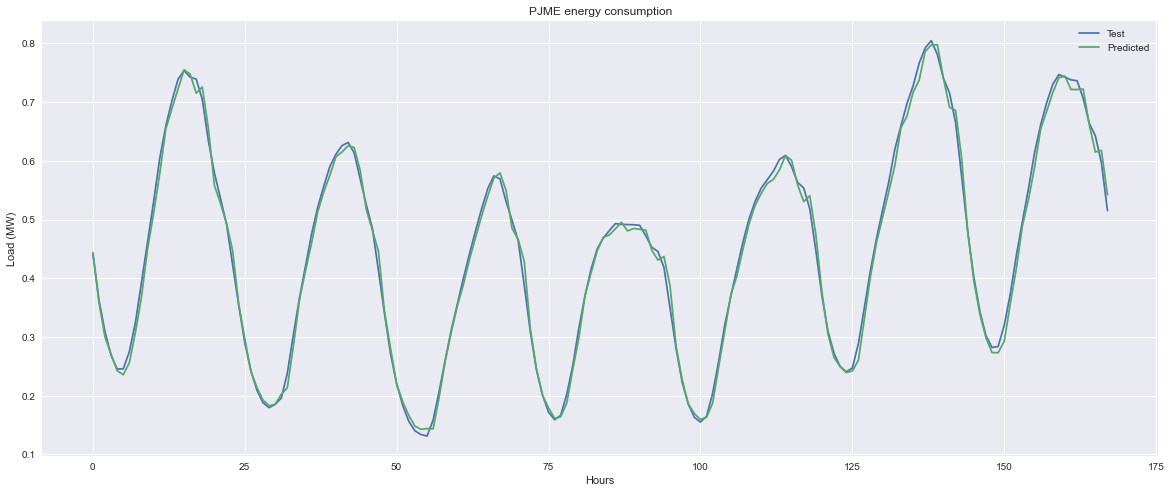

In [24]:
# checking predictions for a week
y_pred = best_model.predict(x_test[-24*7:])

# plotting the predicted values
plt.figure(figsize=(20, 8))
plt.plot(y_test[-24*7:], label='Test')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption')
plt.legend()
plt.show()

23/23 [==============================] - 0s 5ms/step


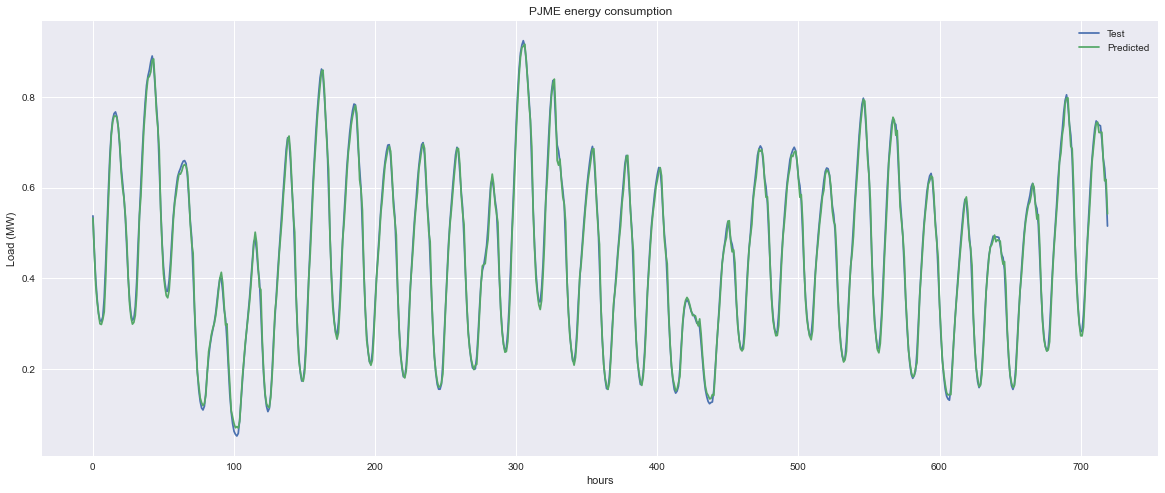

In [25]:
# checking predictions for a month
y_pred = best_model.predict(x_test[-24*30:])

# plotting the predicted values
plt.figure(figsize=(20, 8))
plt.plot(y_test[-24*30:], label='Test')
plt.plot(y_pred, label='Predicted')
plt.xlabel('hours')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption')
plt.legend()

274/274 [==============================] - 1s 4ms/step


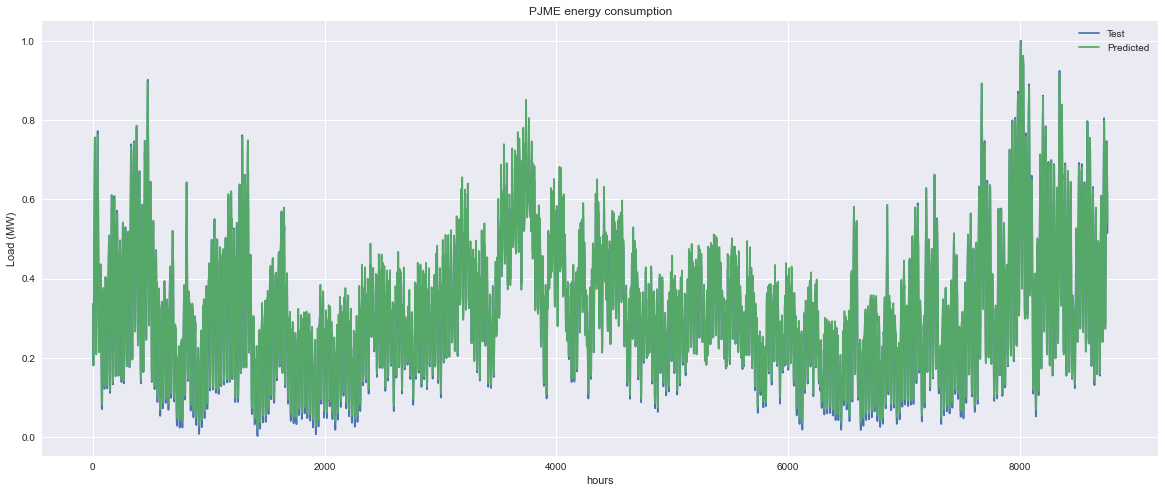

In [26]:
# checking predictions for a year
y_pred = best_model.predict(x_test[-24*365:])
# plotting the predicted values
plt.figure(figsize=(20, 8))
plt.plot(y_test[-24*365:], label='Test')
plt.plot(y_pred, label='Predicted')
plt.xlabel('hours')
plt.ylabel('Load (MW)')
plt.title('PJME energy consumption')
plt.legend()